In [31]:
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
import tensorflow as tf
import math
#import sympy as sym
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics

import random
import csv

In [32]:
#['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
#   0     1       2           3           4          5            6        7      8           9        10      11          12         13      14           15         16
job=['unknown','admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed']
marital=['unknown','divorced','married','single']
education=['unknown','primary','secondary','tertiary']
default=['unknown','no','yes']
housing=['unknown','no','yes']
loan=['unknown','no','yes']
contact=['unknown','cellular','telephone']
month=['unknown','jan', 'feb', 'mar', 'apr', 'may','jun','jul','aug','sep','oct', 'nov', 'dec']
day_of_week=['unknown','mon','tue','wed','thu','fri']
poutcome=['unknown','failure','success','other']
y=['no','yes']

def indexConverter(lst, string):
    return lst.index(string)
def indexReveser(lst, index):
    return lst[index]

In [33]:
dataList=[]
with open('Data/bank-full.csv', 'r') as file:
    reader = csv.reader(file,delimiter=';')
    for row in reader:
        #print(row)
        dataList.append(row)

#print(dataList[0])
dataList.pop(0)
#print(dataList)
random.shuffle(dataList)# this is for random pick
# print(dataList)

# for i in range(len(dataList)):
#     print(dataList[i][3])


features=[]
correctAnswer=[]

#collect the features
for i in range(len(dataList)):
    features.append([])
    features[-1].append(float(dataList[i][0]))
    features[-1].append(indexConverter(job, dataList[i][1]))
    features[-1].append(indexConverter(marital, dataList[i][2]))
    features[-1].append(indexConverter(education, dataList[i][3]))
    features[-1].append(indexConverter(default ,dataList[i][4]))
    features[-1].append(float(dataList[i][5]))
    features[-1].append(indexConverter(housing, dataList[i][6]))
    features[-1].append(indexConverter(loan, dataList[i][7]))
    features[-1].append(indexConverter(contact, dataList[i][8]))
    features[-1].append(float(dataList[i][9]))
    features[-1].append(indexConverter(month,dataList[i][10]))
    features[-1].append(float(dataList[i][11]))
    features[-1].append(float(dataList[i][12]))
    features[-1].append(float(dataList[i][13]))
    features[-1].append(float(dataList[i][14]))
    features[-1].append(indexConverter(poutcome,dataList[i][15]))
        
#print(features)

#collect the Answers
for i in range(len(dataList)):
    #correctAnswer.append(indexConverter(y,dataList[i][-1]))
    if indexConverter(y,dataList[i][-1])==0:
        correctAnswer.append([1,0])
    else:
        correctAnswer.append([0,1])
#print(correctAnswer) 


#Ok, let's first 70% of the set for training and last 30% for testing
trainingIndex=int(0.7*len(features))

#print(len(features),trainingIndex)

featuresNp=np.array(features)
#print(featuresNp)
correctAnswerNp=np.array(correctAnswer)
# for val in correctAnswerNp:
#     print(val, end=' ')

featuresNp[0]

array([ 50.,  10.,   2.,   2.,   1., 503.,   2.,   1.,   1.,  24.,   7.,
       186.,   2.,  -1.,   0.,   0.])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               2176      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 130       
Total params: 27,074
Trainable params: 27,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
989/989 [==============================] - 2s 2ms/step - loss: 16.7719 - binary_accuracy: 0.8170
Epoch 2/100
989/989 [==============================] - 2s 2ms/step - loss: 0.8946 - binary_accuracy: 0.8653
Epoch 3/100
989/989 [==========

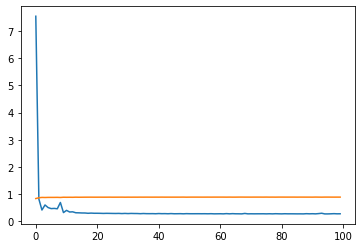

In [34]:
model = keras.Sequential()
# input layer
model.add(keras.layers.Dense(units = 128, activation = 'linear', input_shape=(16,)))

# ........ Add as many dense layer as you want (one is added for you) ............
model.add(keras.layers.Dense(units = 128, activation = 'linear'))
model.add(keras.layers.Dense(units = 64, activation = 'linear'))
# model.add(keras.layers.Dense(units = 64, activation = 'relu'))

# output layer
model.add(keras.layers.Dense(units = 2, activation = 'softmax'))

# compile model with loss function and optimizier
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=[keras.metrics.binary_accuracy])


model.summary()


history=model.fit(featuresNp[:trainingIndex], correctAnswerNp[:trainingIndex], epochs=100, verbose=1)#batch_size=32

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["binary_accuracy"])
plt.show()

In [35]:
pred=model.predict(featuresNp[trainingIndex:])


print(len(pred),len(correctAnswerNp[trainingIndex:]))

# for val in pred:
#     print(val, end=' ')
print(pred[-3:],'\n', correctAnswerNp[-3:],'\n', featuresNp[-3:],'\n',dataList[-3:])

hits=0

ii=0
for i in range(trainingIndex, len(correctAnswerNp)):
    if pred[ii][1]>=pred[ii][0]:
        if correctAnswerNp[i][1]==1:
            hits+=1
    else:
        if correctAnswerNp[i][0]==1:
            hits+=1
    
    ii+=1
    
print(hits/len(pred))



13564 13564
[[0.9890676  0.01093233]
 [0.99776936 0.00223063]
 [0.6815164  0.3184836 ]] 
 [[1 0]
 [1 0]
 [0 1]] 
 [[ 33.   8.   3.   2.   1. 149.   1.   2.   1.   7.   7. 254.   1.  -1.
    0.   0.]
 [ 38.   2.   2.   2.   1. 395.   2.   1.   1.   8.   5.  83.   1. 367.
    2.   1.]
 [ 27.  10.   3.   2.   2.   0.   1.   2.   1.   8.   7. 732.   1.  -1.
    0.   0.]] 
 [['33', 'services', 'single', 'secondary', 'no', '149', 'no', 'yes', 'cellular', '7', 'jul', '254', '1', '-1', '0', 'unknown', 'no'], ['38', 'blue-collar', 'married', 'secondary', 'no', '395', 'yes', 'no', 'cellular', '8', 'may', '83', '1', '367', '2', 'failure', 'no'], ['27', 'technician', 'single', 'secondary', 'yes', '0', 'no', 'yes', 'cellular', '8', 'jul', '732', '1', '-1', '0', 'unknown', 'yes']]
0.8905927455028015


In [36]:
pred = pred.tolist()
correctAnswerNp = correctAnswerNp.tolist()
ii=0
for i in range(trainingIndex, len(correctAnswerNp)):
    pred[ii] = pred[ii].index(max(pred[ii]))
    correctAnswerNp[i] = correctAnswerNp[i].index(max(correctAnswerNp[i]))
    
    ii+=1
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(correctAnswerNp[trainingIndex:len(correctAnswerNp)],pred),accuracy_score(correctAnswerNp[trainingIndex:len(correctAnswerNp)],pred)

(array([[11769,   213],
        [ 1271,   311]], dtype=int64),
 0.8905927455028015)